In [76]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Define your base directory where the tfevents files are located
base_dir = 'results\\'

# Initialize a structure to hold your metrics data
# Structure: {loss_function: {metric: {fold: [values]}}}
metrics_data = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

# Walk through the directory structure
for root, dirs, files in os.walk(base_dir):

    for file in files:
        if file.startswith('events.out.tfevents'):

            # print(root)
            # print(dirs)
            # print(files)

            # Extract relevant parts from the path
            parts = root.split(os.path.sep)
            # print(parts)
            # Parse out the loss function, fold number, and metric from the directory structure
            loss_function = "_".join(parts[1].split('_')[1:-1])  # 'rankNet', 'point_wise_rmse', etc.
            fold = parts[1].split('Fold')[1]  # '1', '2', etc.
            metric = parts[5].split('_')[0] + "_" +  parts[5].split('_')[1] # 'map', 'mrr', etc.

            # Read the tfevents file
            path_to_events_file = os.path.join(root, file)


            for e in tf.compat.v1.train.summary_iterator(path_to_events_file):
                for v in e.summary.value:
                        metrics_data[loss_function][metric][fold].append(v.simple_value)




approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCGLoss
approxNDCG

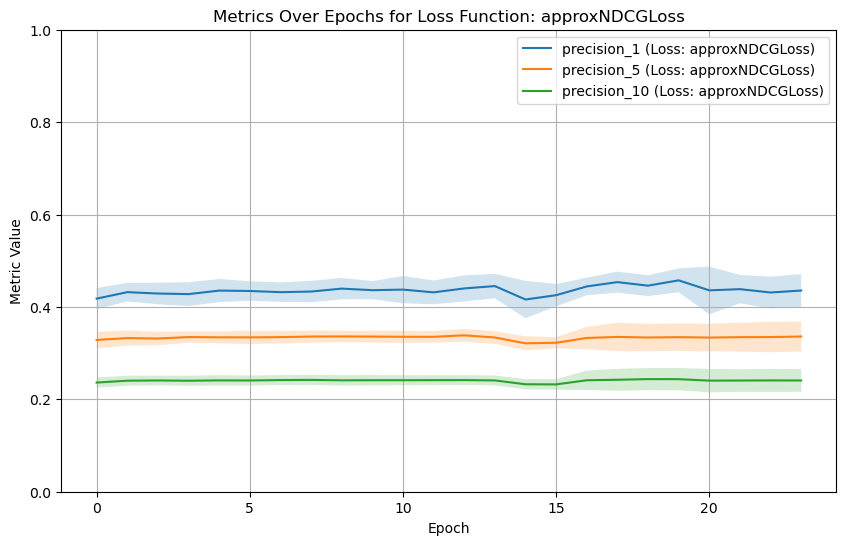

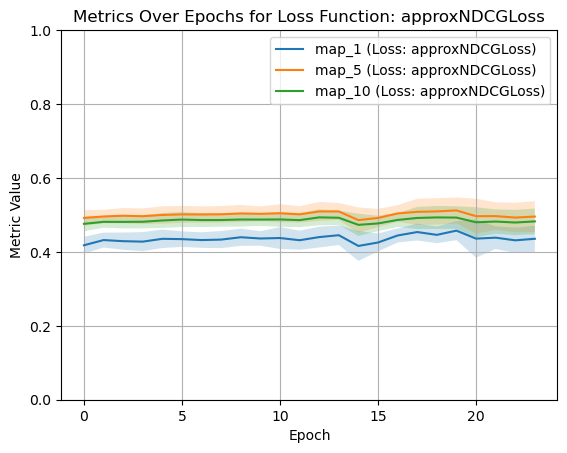

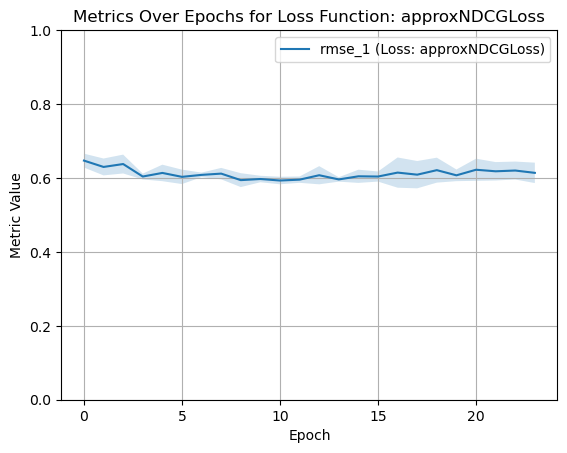

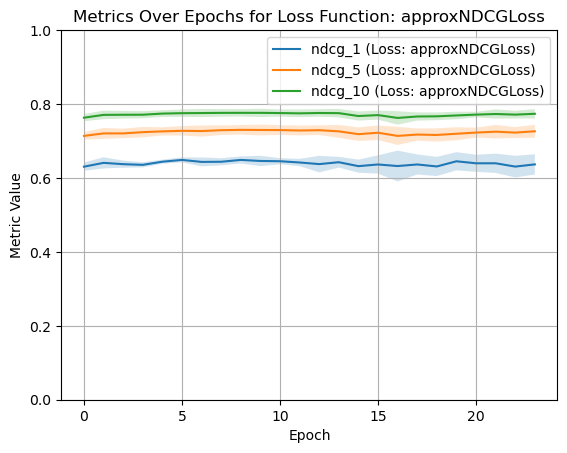

In [80]:
list_metric = ["precision", "map", "rmse", "ndcg"]
levels = [1, 5, 10]

for loss in metrics_data.keys():
    plt.figure(figsize=(10, 6))  # New figure for each loss function

    for metric in list_metric:
        for level in levels:
            current_metric = f"{metric}_{level}"

            if current_metric in metrics_data[loss]:  # Check if the current metric exists
                # Prepare data for plotting
                transposed_values = zip(*metrics_data[loss][current_metric].values())
                average = np.array([np.mean(group) for group in transposed_values])
                transposed_values = zip(*metrics_data[loss][current_metric].values())  # Re-transpose for std calculation
                std = np.array([np.std(group) for group in transposed_values])
                epochs = range(0, len(average))

                # Plotting
                plt.plot(epochs, average, label=f'{current_metric} (Loss: {loss})')
                plt.fill_between(epochs, average - std, average + std, alpha=0.2)

        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        plt.ylim(0, 1)  # Assuming you want all plots to have their y-axis between 0 and 1
        plt.title(f'Metrics Over Epochs for Loss Function: {loss}')
        plt.legend()
        plt.grid(True)
        plt.show()
